Data Science General Assembly Final Project

# Main Question: What makes a clickable title?

I'm very interested, in general, in numerically understanding what make's something "beautiful" weather it be something that is pleasing to the eye, or something you read. This is my first step into this venture.

FieldName|Type|Description
---------|----|-----------
post_id|string|unique identifier
page_title|string|Title of the article
publish_date|TimeSeries|Date and time published
p_new_session|float| Percent of page views were first entry
time_on_page|float|(average)number of seconds spent on page 
Pageview|int|Times page was viewed (response)
Noun|int|Count of Nouns in title
Verb|int|Count of Verbs in title
Adj|int|Count of Adjectives in title
Det|int|Count of Determiners in title
Hour|int|Hour published 
DayofWeek|int|Day of week published (0=Monday)
Compisition|string|Position of numbers and presence of "The" in first position 
Class|Bool|Whether article is successful or not, based on just above the median of pageviews 1=Successful

In [780]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.style.use('fivethirtyeight')
import spacy #Parts of speech counts
from spacy.en import English


# Cleaning

In [781]:
df = pd.read_csv('project_finalsports')
s = df['date_published'].astype(str)

In [782]:
df1 = df.drop('date_published', axis=1)
df1 = df1.drop('Unnamed: 0', axis=1)
df1 = df1.drop('unique_pageviews', axis=1)
df1['post_id'] = df1['post_id'].astype(str)
df1['page_title'] = df1['page_title'].astype(str)

In [783]:
s = pd.to_datetime(s, format='%Y-%m-%d')

In [784]:
df1 = pd.concat([df1, s], axis=1)

In [785]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1170 entries, 0 to 1169
Data columns (total 6 columns):
post_id           1170 non-null object
Pageviews         1170 non-null int64
p_new_sessions    1170 non-null float64
time_on_page      1170 non-null float64
page_title        1170 non-null object
date_published    1169 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 64.0+ KB


# Adding Parts of speech counts 

In [786]:
titles = df1['page_title']
df1['Noun'] = np.nan
df1['Verb'] = np.nan
df1['AdJ'] = np.nan
df1['Det'] = np.nan


nounsCount= []
verbCount= []
adjCount= []
detCount= []


nlp = English()
for title in titles:
    doc = nlp(unicode(title, 'utf-8'))
    nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.NOUN]
    nounsCount.append(len(nouns)) 
    verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
    verbCount.append(len(verbs)) 
    adj = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.ADJ]  
    adjCount.append(len(adj)) 
    det = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.DET]  
    detCount.append(len(det)) 
    

In [787]:
df1['Noun'] = nounsCount
df1['Verb'] = verbCount
df1['AdJ'] = adjCount
df1['Det'] = detCount


In [788]:
df1.head()

,post_id,Pageviews,p_new_sessions,time_on_page,page_title,date_published,Noun,Verb,AdJ,Det
0,455553.0,80687,0.008,0.059,11 Fastest 40-Yard Dashes in NFL History,2016-02-27 13:35:00,4,1,0,0
1,436259.0,80437,0.008,0.053,NFL's Oldest: 7 Quarterbacks Who Played into T...,2016-01-25 05:53:00,5,1,1,0
2,496982.0,64949,0.008,0.060,The NFL's 10 Greatest Players of All ­Time,2015-10-09 16:59:00,4,0,0,2
3,456241.0,60536,0.008,0.058,The 7 Richest NFL Players of All Time,2016-01-17 14:20:00,4,0,0,2
4,476680.0,51959,0.008,0.048,The 10 Greatest NFL Wide Receivers of All Time,2015-12-31 12:28:01,4,0,1,2


In [789]:
df2 = df1.copy()

In [790]:
#trying to make question col

#question = ['what','where','why','how','who','when']
#df1['quest'] = np.nan

#titles = df1['page_title']
#quest= []

#for title in titles:
    #for word in question:
       # if title==word:
        #    quest.append(1)
    #else: quest.append(0)

#for word in question:
    #if word == question:
        #quest.append(1)
#else:return 0
    
    
    #doc = nlp(unicode(title, 'utf-8'))
    #nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.NOUN]
    #nounsCount.append(len(nouns)) 

In [791]:
#df1.head(50)

In [98]:

#df1['h_ofalltime'] = df1['page_title'].str.contains('of all time').astype(int)
#df1['h_nfl'] = df1['page_title'].str.contains('nfl').astype(int)
#df1['h_10greatest'] = df1['page_title'].str.contains('10 greatest').astype(int)
#df1['h_nba'] = df1['page_title'].str.contains('nba').astype(int)
#df1['h_players'] = df1['page_title'].str.contains('players').astype(int)
#df1['h_best'] = df1['page_title'].str.contains('best').astype(int)
#df1['h_history'] = df1['page_title'].str.contains('history').astype(int)
#df1['h_highest'] = df1['page_title'].str.contains('highest').astype(int)


In [100]:
#df1['h_ofalltime'].map({1: 0.006025, 0: 0})

In [729]:

#df1['h_ofalltime'] = df1['h_ofalltime'].map({1: 0.006025, 0: 0}) 
#df1['h_nfl'] = df1['h_ofalltime'].map({1: 0.005880, 0: 0})
#df1['h_10greatest'] = df1['h_ofalltime'].map({1: 0.005665, 0: 0})
#df1['h_nba'] = df1['h_ofalltime'].map({1: 0.005173, 0: 0})
#df1['h_players'] = df1['h_ofalltime'].map({1: 0.005150, 0: 0})
#df1['h_best'] = df1['h_ofalltime'].map({1: 0.004592, 0: 0})
#df1['h_history'] = df1['h_ofalltime'].map({1: 0.004508, 0: 0})
#df1['h_highest'] = df1['h_ofalltime'].map({1: 0.004461, 0: 0})



In [792]:
#Splitting up first 3 words 
df1['word1'] = df1.page_title.apply(lambda x: x.split()[0]).astype(str)
df1['word2'] = df1.page_title.apply(lambda x: x.split()[1:2]).astype(str)
df1['word3'] = df1.page_title.apply(lambda x: x.split()[2:3]).astype(str)

In [793]:
#Clean
df1['word2'] = [x.replace(']', '') for x in df1['word2']]
df1['word2'] = [x.replace('[', '') for x in df1['word2']]
df1['word2'] = [x.replace('' '', '') for x in df1['word2']]
df1['word3'] = [x.replace('[', '') for x in df1['word3']]
df1['word3'] = [x.replace(']', '') for x in df1['word3']]

Unfortunately I could only find out the order of if there were numbers and if there was the word "The" in the first postition

I wanted to:
- Split each word (of the first 3 words) into their own col.
- Scan what part of speech they were
- Create a tally system to find out the ouder of each title (i.e num,noun,verb/"The",num,verb)
- Turn those tallies into strings so I can group them and find out how many are in each group

In [550]:
#word1 = df1['word1']
#df1['Noun1'] = np.nan
#df1['Verb1'] = np.nan
#df1['Adverb'] = np.nan
#df1['Num'] = np.nan

#nounsCount1= []
#verbCount1= []
#adCount= []
#numCount= []

#nlp = English()
#for word in word1:
    #doc = nlp(unicode(title, 'utf-8'))
    #nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.ADJ]
    #nounsCount1.append(len(nouns)) 
    #verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
    #verbCount1.append(len(verbs)) 
    
#df1['Noun1'] = nounsCount1
#df1['Verb1'] = verbCount1

In [551]:
#df1 = df1.drop('Noun1', axis=1)

In [462]:
#word2 = df1['word2']
#df1['Noun2'] = np.nan
#df1['Verb2'] = np.nan
#df1['Adverb'] = np.nan
#df1['Num'] = np.nan

#nounsCount2= []
#verbCount2= []
#adCount= []
#numCount= []

#nlp = English()
#for word in word2:
    #doc = nlp(unicode(title, 'utf-8'))
    #nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.NOUN]
    #nounsCount2.append(len(nouns)) 
    #verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
    #verbCount2.append(len(verbs)) 
    
#df1['Noun2'] = nounsCount2
#df1['Verb2'] = verbCount2


In [757]:
#word3 = df1['word3']
#df1['Noun3'] = np.nan
#df1['Verb3'] = np.nan
#df1['Adverb'] = np.nan
#df1['Num'] = np.nan

#nounsCount3= []
#verbCount3= []
#adCount= []
#numCount= []

#nlp = English()
#for word in word3:
    #doc = nlp(unicode(title, 'utf-8'))
    #nouns = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.ADJ]
    #nounsCount3.append(len(nouns)) 
    #verbs = [el.lemma_ for el in doc if el.pos == spacy.parts_of_speech.VERB]
    #verbCount3.append(len(verbs)) 
    
#df1['Noun3'] = nounsCount3
#df1['Verb3'] = verbCount3

In [794]:
df1['The'] = df1['word1'].str.contains('The').astype(int)/500000
df1['0.1'] = df1['word1'].str.contains('0').astype(int)/10
df1['1.1'] = df1['word1'].str.contains('1').astype(int)/10
df1['2.1'] = df1['word1'].str.contains('2').astype(int)/10
df1['3.1'] = df1['word1'].str.contains('3').astype(int)/10
df1['4.1'] = df1['word1'].str.contains('4').astype(int)/10
df1['5.1'] = df1['word1'].str.contains('5').astype(int)/10
df1['6.1'] = df1['word1'].str.contains('6').astype(int)/10
df1['7.1'] = df1['word1'].str.contains('7').astype(int)/10
df1['8.1'] = df1['word1'].str.contains('8').astype(int)/10
df1['9.1'] = df1['word1'].str.contains('9').astype(int)/10

df1['0.2'] = df1['word2'].str.contains('0').astype(int)/100
df1['1.2'] = df1['word2'].str.contains('1').astype(int)/100
df1['2.2'] = df1['word2'].str.contains('2').astype(int)/100
df1['3.2'] = df1['word2'].str.contains('3').astype(int)/100
df1['4.2'] = df1['word2'].str.contains('4').astype(int)/100
df1['5.2'] = df1['word2'].str.contains('5').astype(int)/100
df1['6.2'] = df1['word2'].str.contains('6').astype(int)/100
df1['7.2'] = df1['word2'].str.contains('7').astype(int)/100
df1['8.2'] = df1['word2'].str.contains('8').astype(int)/100
df1['9.2'] = df1['word2'].str.contains('9').astype(int)/100

df1['0.3'] = df1['word2'].str.contains('0').astype(int)/1000
df1['1.3'] = df1['word2'].str.contains('1').astype(int)/1000
df1['2.3'] = df1['word2'].str.contains('2').astype(int)/1000
df1['3.3'] = df1['word2'].str.contains('3').astype(int)/1000
df1['4.3'] = df1['word2'].str.contains('4').astype(int)/1000
df1['5.3'] = df1['word2'].str.contains('5').astype(int)/1000
df1['6.3'] = df1['word2'].str.contains('6').astype(int)/1000
df1['7.3'] = df1['word2'].str.contains('7').astype(int)/1000
df1['8.3'] = df1['word2'].str.contains('8').astype(int)/1000
df1['9.3'] = df1['word2'].str.contains('9').astype(int)/1000


In [795]:

df1['composition'] = df1['The'] + df1['0.1'] + df1['1.1'] + df1['2.1'] + df1['3.1'] + \
df1['4.1'] + df1['5.1'] + df1['6.1'] + df1['7.1'] + df1['8.1'] + df1['9.1'] + \
df1['0.2'] + df1['1.2'] + df1['2.2'] + df1['3.2'] + df1['4.2'] + df1['5.2'] + \
df1['6.2'] + df1['7.2'] + df1['8.2'] + df1['9.2'] + df1['0.3'] + df1['1.3'] + \
df1['2.3'] + df1['3.3'] + df1['4.3'] + df1['5.3'] + df1['6.3'] + df1['7.3'] + \
df1['8.3'] + df1['9.3'] 


In [796]:
df1.to_csv(path_or_buf='project_finalsportsSpacy')

In [490]:
#from spacy.en import English
#parser = English()


In [760]:
#example = df['page_title']
#parsedEx = parser(example)
#for token in parsedEx:
    #print(token.orth_, token.ent_type_ if token.ent_type_ != "" else "(not an entity)")

#print("-------------- entities only ---------------")
# if you just want the entities and nothing else, you can do access the parsed examples "ents" property like this:
#ents = list(parsedEx.ents)
#for entity in ents:
    #print(entity.label, entity.label_, ' '.join(t.orth_ for t in entity))

# How many titles fit into each category?

In [797]:
df1['composition'].value_counts()


0.000    595
0.011    181
0.100    152
0.011    113
0.200     31
0.000     24
0.022     23
0.022     19
0.044     17
0.400      8
0.044      5
0.244      1
0.033      1
Name: composition, dtype: int64

In [798]:
k = df1['composition'].astype(str)

In [799]:
df3 = pd.concat([df2, k], axis=1)

In [800]:
df3.head()


,post_id,Pageviews,p_new_sessions,time_on_page,page_title,date_published,Noun,Verb,AdJ,Det,composition
0,455553.0,80687,0.008,0.059,11 Fastest 40-Yard Dashes in NFL History,2016-02-27 13:35:00,4,1,0,0,0.1
1,436259.0,80437,0.008,0.053,NFL's Oldest: 7 Quarterbacks Who Played into T...,2016-01-25 05:53:00,5,1,1,0,0.0
2,496982.0,64949,0.008,0.060,The NFL's 10 Greatest Players of All ­Time,2015-10-09 16:59:00,4,0,0,2,2e-06
3,456241.0,60536,0.008,0.058,The 7 Richest NFL Players of All Time,2016-01-17 14:20:00,4,0,0,2,0.011002
4,476680.0,51959,0.008,0.048,The 10 Greatest NFL Wide Receivers of All Time,2015-12-31 12:28:01,4,0,1,2,0.022002


In [801]:
df3['class'] = df3['Pageviews'].apply(lambda x: x>1000).astype(int)

In [766]:
df3c = df3[df3['class'] == 1]
df3o = df3[df3['class'] == 0]



In [767]:
df3c.composition.value_counts()
    

0.0         109
0.011        50
0.011002     38
0.1          38
0.2          15
0.022002     10
2e-06         6
0.022         6
Name: composition, dtype: int64

In [768]:
df3o.composition.value_counts()

0.0         486
0.011       131
0.1         114
0.011002     75
2e-06        18
0.044        17
0.022        17
0.2          16
0.022002      9
0.4           8
0.044002      5
0.033         1
0.244         1
Name: composition, dtype: int64

In [802]:
df3['DayofWeek'] = df3['date_published'].apply(lambda x: x.isoweekday())
df3.set_index('date_published', inplace=True)
df3['hour'] = df3.index.hour

In [803]:
df3['class'].value_counts()

0    898
1    272
Name: class, dtype: int64

In [771]:
df3.to_csv(path_or_buf='project_finalsportsLog')

In [804]:
#scale = StandardScaler()
#X_scale = pd.DataFrame(scale.fit_transform(X))
#X_scale.columns = X.columns
df3 = df3.drop('page_title', axis=1)




In [805]:
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.grid_search import GridSearchCV


In [806]:
df3 = df3.dropna(axis=0)

In [807]:
X = df3.drop('class',axis=1).copy()
y = df3['class']

In [808]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

In [809]:
scale = StandardScaler()
scale.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [810]:
X_train_std = scale.transform(X_train)
X_test_std = scale.transform(X_test)

In [811]:
km = KMeans(n_clusters=3, n_init=20)
km.fit(X_train_std)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=20,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [812]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [813]:
columns = {str(x): scale.inverse_transform(km.cluster_centers_[x]) for x in range(0,len(km.cluster_centers_))}

In [814]:
pd.DataFrame(columns, index=X.columns)

,0,1,2
post_id,511278.187,573033.786,494922.917
Pageviews,1494.550,839.115,41197.083
p_new_sessions,0.008,0.006,0.008
time_on_page,0.001,0.001,0.038
Noun,4.407,5.442,3.917
Verb,0.870,0.921,0.417
AdJ,0.629,0.158,0.583
Det,0.916,1.022,1.167
composition,0.047,0.009,0.064
DayofWeek,4.561,3.897,4.500


In [815]:
df3.mean()

Pageviews        1738.549
p_new_sessions      0.007
time_on_page        0.002
Noun                4.986
Verb                0.876
AdJ                 0.362
Det                 0.997
class               0.232
DayofWeek           4.202
hour               13.095
dtype: float64

# Clusters
    - 1
        - Low Adj count
        - Early in the week
        - Earlier in the day
        - Low Pageviews
    - 2
        - High time on page
        - Low noun count
        - Low verb count
        - A lot of numbers
        - High Pageviews
        
I would really like to explore the positioning of the parts of speech more I think this would help to further understand what makes these titles work. Because it looks like my results show that it's good to have a lot of numbers with low nouns and low verbs but that doesn't have a lot of direction attached to it. 

I think more data is really going to be the answer here. I tried count vectorizor and random forest to do feature importance on certain words but they were so low it wasn't worth including. If I had more data I would expect this would change.

# Looks like I should have between 2-6 clusters

In [816]:
from sklearn.cluster import KMeans

In [817]:
%%time
km = KMeans(n_clusters=7, n_init=10)
cluster_labels = km.fit_predict(df3)

CPU times: user 147 ms, sys: 22.8 ms, total: 170 ms
Wall time: 182 ms


In [818]:
from sklearn.metrics import silhouette_score
print silhouette_score(X, cluster_labels)

0.554339601274


In [819]:
print km.inertia_


85381109223.7


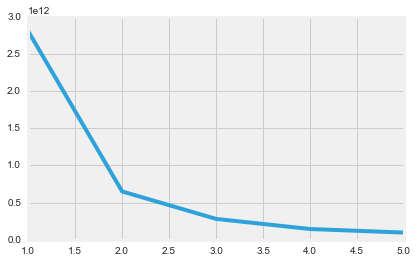

In [580]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []
for n in range(1,6):
    km2 = KMeans(n_clusters=n)
    km2.fit(df3)
    x.append(n)
    y.append(km2.inertia_)
plt.plot(x, y)

In [581]:
from sklearn.metrics import silhouette_score
print silhouette_score(df3, cluster_labels)

0.575157116472


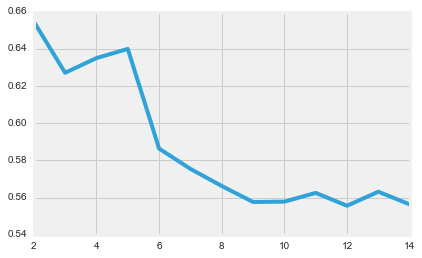

In [582]:
x = []
y = []
for n in range(2,15):
    km2 = KMeans(n_clusters=n)
    centers = km2.fit_predict(df3)
    x.append(n)
    y.append(silhouette_score(df3, centers))
plt.plot(x, y)